Размерность (форма) датасета:  (241, 4)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Точность модели:  -8.821619776429674


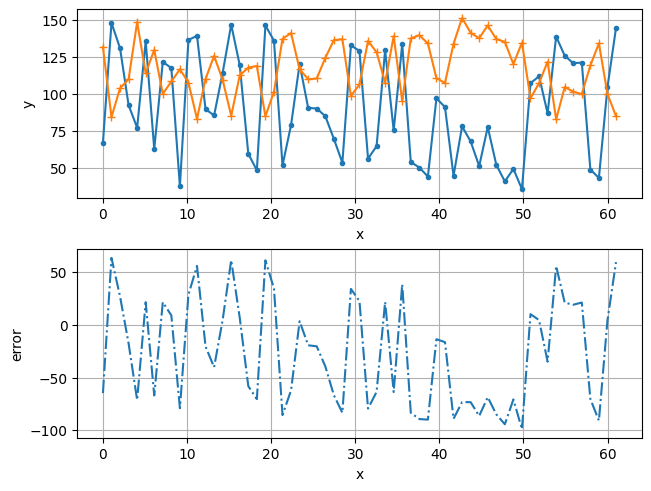

In [15]:
# ________  Прогноз курса доллара ________
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os
import seaborn as sns

df = pd.read_excel('/content/курс_доллара2022.xlsx') # загрузка таблицы с курсом $
# Для справки: имена столбцов таблицы: Open	High	Low	Close

# смотрим тепловую матрицу heatmap - она должна быть однотонной,в противном случае
# при желтых полосках надо устранить наличие пустых ячеек в таблице
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

df=np.array(df)  # преобразуем в тип numpy.ndarray для работы с данными как с массивом
data=df[:,0:-1]  # берем все столбцы, кроме последнего - в нем даты
print('Размерность (форма) датасета: ',data.shape)

# вместо даты в курсе валюты будем использовать их порядковый номер (номера отсчетов)
t=np.linspace ( 0 , data.shape[0] , data.shape[0])  # генерация номеров отсчетов по количеству строк в data
# пристыковываем столбцец t слева к data
tt=np.zeros((data.shape[0],1)) # шаблон для пристыковки, т.к. t не совпадает по форме с data
tt[:,0]=t                      # присваиваем значения t столбцу tt
data=np.hstack([tt,data])      # пристыковка tt к data

# Будем считать что ВХОД x это t, т.е. x=t, а ВЫХОД y=Open
x=data[:,0]  # присвоили x=t
x=x.reshape(-1, 1)  # изменяем форму х, так как он содержит один признак - t,
# -1 означает, что строки неизвестны (формируй как угодно), а 1 - что должен быть один столбец!
# для многмерного ряда этого не делать, просто записать x=data[:,0:n], где n - число компонент ряда
y=data[:,-1]

# разбиваем данные на обучающие и тестирующие
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=1)

# Многослойный персептронный регрессор
regr = MLPRegressor(hidden_layer_sizes=(10,7,15),random_state=1, max_iter=500).fit(X_train, y_train)
print('\nТочность модели: ',regr.score(X_test, y_test))

# Визуализация результатов
Yr=regr.predict(X_test)  # вычисляем выход модели на тестовых данных
fig, axs = plt.subplots(2, 1, layout='constrained')
t1=np.linspace ( 0 , Yr.shape[0] , Yr.shape[0])  # сделали для откладывания по оси абсцис
axs[0].plot(t1,Yr,'.-',t1,y_test,'+-')
axs[0].set_xlabel('x');axs[0].set_ylabel('y');axs[0].grid(True)

axs[1].plot(t1, (Yr-y_test),'-.')
#axs[1].set_xlim(0, 2)
axs[1].set_xlabel('x');axs[1].set_ylabel('error');axs[1].grid(True)
plt.show()

In [14]:
# x, y = make_classification(n_features=30, n_classes = 3)
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x.shape



(241, 1)